<a href="https://colab.research.google.com/github/LuisBGodoi/Portfolio/blob/main/Population_Economic_analysis_of_the_coffee_market_in_Denver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

## 💾 The data
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

In [ ]:
%%capture
pip install geopandas

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
denver = pd.read_csv('/content/denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [ ]:
neighborhoods = gpd.read_file('/content/neighborhoods.shp')
neighborhoods

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."
...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7..."
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7..."
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7..."
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7..."


In [ ]:
census = pd.read_csv('/content/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


## 💪 Challenge
Provide your client a list of neighborhoods in Denver where they should consider expanding. Include:
* A visualization of Denver's neighborhoods and the Starbucks store locations.
* Find the neighborhoods with the highest proportion of people in the target demographic.
* Select the top three neighborhoods where your client should focus their search.

To provide my client the best visualization of the Starbucks stores, Denver neighborhoods and the target demographics i started merging the neighborhoods gpd with the census data. With that i can plot the map with the data of the census.
Also i isolated the coordenates of the starbucks date to help me in the plotting process

In [ ]:
neighborhoods_census = neighborhoods.merge(census, on="NBHD_NAME")
starbucks_coord= pd.pivot_table(denver, values=['Latitude','Longitude'],index='StoreNumber')

My first idea was to plot the map of Denver with

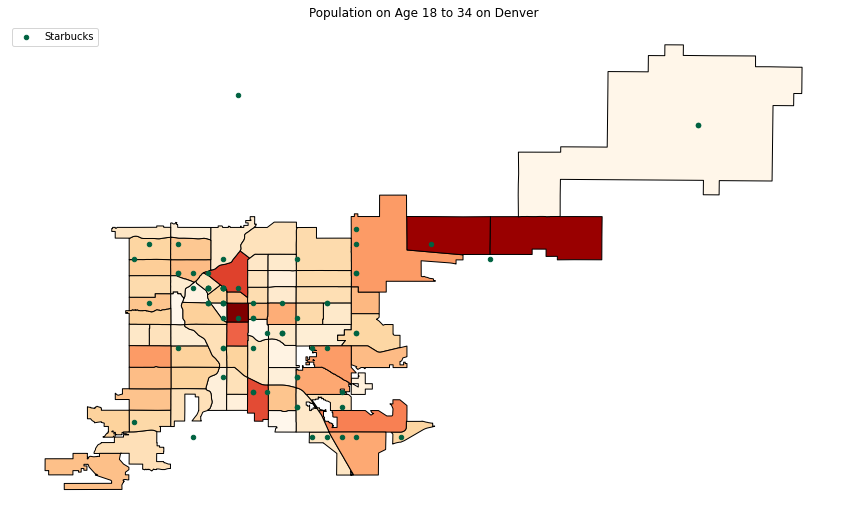

In [ ]:
fig, ax = plt.subplots()

ax.set_aspect('equal')

starbucks_coord= pd.pivot_table(denver, values=['Latitude','Longitude'],index='StoreNumber')

neighborhoods_census.plot(ax=ax,column='AGE_18_TO_34',figsize=(18,9),cmap='OrRd',edgecolor='black')

starbucks_coord.plot(ax=ax,x='Longitude',y='Latitude',kind='scatter',figsize=(18,9),color='#006241',marker='o',legend=True)

ax.set_axis_off()

ax.set_title('Population on Age 18 to 34 on Denver')

ax.legend(['Starbucks'],loc=2)

plt.show()


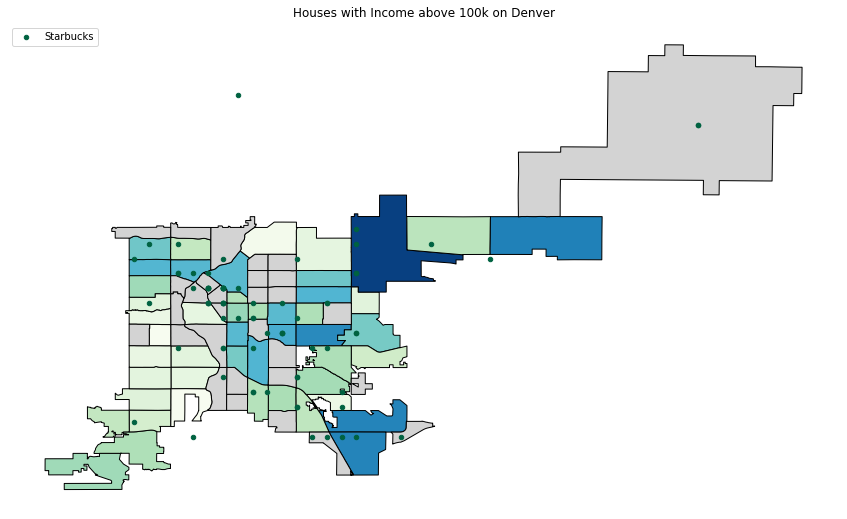

In [ ]:


fig, ax = plt.subplots()

ax.set_aspect('equal')

starbucks_coord= pd.pivot_table(denver, values=['Latitude','Longitude'],index='StoreNumber')

neighborhoods_census.plot(ax=ax,column='NUM_HHLD_100K+',figsize=(18,9),cmap='GnBu',missing_kwds={'color': 'lightgrey'},edgecolor='black')

starbucks_coord.plot(ax=ax,x='Longitude',y='Latitude',kind='scatter',figsize=(18,9),color='#006241',marker='o',legend=True)

ax.set_axis_off()

ax.set_title('Houses with Income above 100k on Denver')

ax.legend(['Starbucks'],loc=2)

plt.show()


With this maps my client can see where have more people in the age target and with more money.

The only problem is that we can't see the name of the neighboorhoods, so i create a table for this 2 criterias

Also i will calculate the Percentage of people in the target on the neighborhood as request by the client

In [ ]:
pt_age = pd.pivot_table(neighborhoods_census, values=['AGE_18_TO_34','NUM_HHLD_100K+'],index='NBHD_NAME')

df = pt_age.sort_values(by=['AGE_18_TO_34','NUM_HHLD_100K+'], ascending=False)

df


,AGE_18_TO_34,NUM_HHLD_100K+
NBHD_NAME,,
Capitol Hill,8274.0,1223.0
Gateway - Green Valley Ranch,7778.0,2192.0
Montbello,7742.0,939.0
Five Points,5961.0,1680.0
University,5784.0,991.0
...,...,...
Belcaro,621.0,NaN
DIA,462.0,NaN
Country Club,414.0,NaN


In [ ]:
census['Percentage of age 18-34'] = census['AGE_18_TO_34']/census['POPULATION_2010']

AgeTarget = census.sort_values(by=['Percentage of age 18-34'],ascending= False)

AgeTarget.head()


,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,Percentage of age 18-34
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN,0.900709
9,10,CBD,3648.0,84.0,2288.0,1058.0,218.0,2363.0,303.0,NaN,0.627193
63,64,University,9375.0,826.0,5784.0,2246.0,519.0,3759.0,1218.0,991.0,0.616960
8,9,Capitol Hill,14708.0,408.0,8274.0,5155.0,871.0,10856.0,1201.0,1223.0,0.562551
46,47,North Capitol Hill,5823.0,194.0,3238.0,1968.0,423.0,3851.0,461.0,1010.0,0.556071


With that in mind the Auraria is the neighboorhood with more people in the age of 18 - 34, so will probably be the area with more people of 20-35.

With all of that in hands i would suggest for the client to focus on the following the neighboorhoods

- Gateway: because has the second higher number of people on the age of 18-34 so i assume that will also have one of the higher number on the 20-35 range, also it has one of the higher houses with more than 100k of income, meaning that will have more money to spend on coffee. 

- Capitol Hill: the most populous regin on the capital is also a center region that mean that have a higher number of people passing by with that in mind and with the map of starbucks showing us that in the center area have a lot of coffee shops I think its a great area. Also is on of the region with more percentage of the population in the target age

- Central Park: A very high income area that is neighbor of a high populous area is one of the best neighborhoods to build a new coffee shop. Other point that can help us in this conclusion is the presence of 4 starbucks that can mean that they have the habit to buy coffee.


## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!